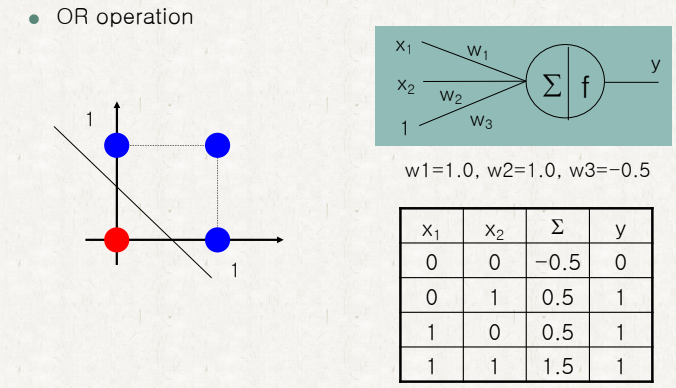

In [ ]:
# Import Library
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Define Dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

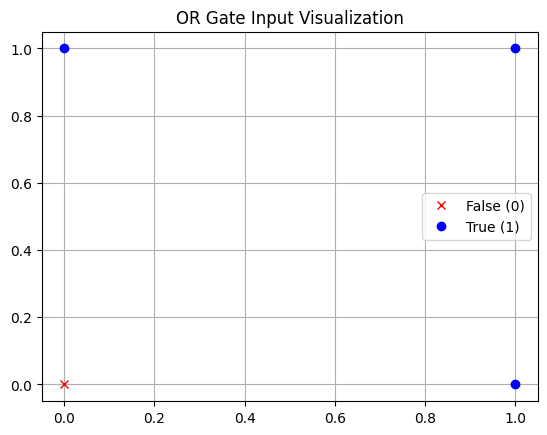

In [ ]:
# Data Visualization
for x, y in zip(X, Y):
    plt.plot(x[0], x[1], 'bo' if y == 1 else 'rx')
plt.legend(['False (0)', 'True (1)'])
plt.title("OR Gate Input Visualization")
plt.grid(True)
plt.show()

In [ ]:
# Device Setting
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X, Y = X.to(DEVICE), Y.to(DEVICE)

In [ ]:
# Define Model
class ORModel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.linear = nn.Linear(2, 1)
        # self.sigmoid = nn.Sigmoid()

        self.W = nn.Parameter(torch.randn(2, 1))  # weight (2x1)
        self.b = nn.Parameter(torch.randn(1))     # bias (1,)

    def forward(self, x):
        #z = x @ self.W + self.b  # 행렬곱 + 편향
        net = torch.matmul(x, self.W) + self.b  # 행렬곱 + 편향
        return torch.sigmoid(net)  # 활성화 함수 적용

        # net = self.linear(x)
        # return self.sigmoid(net)

model = ORModel().to(DEVICE)

In [ ]:
# 옵티마이저 정의
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# 학습
for epoch in range(10001):
    optimizer.zero_grad()
    output = model(X)
    loss = torch.mean((output - Y) ** 2)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch:5d} - Loss: {loss.item():.4f}")

Epoch     0 - Loss: 0.6633
Epoch  1000 - Loss: 0.0579
Epoch  2000 - Loss: 0.0231
Epoch  3000 - Loss: 0.0135
Epoch  4000 - Loss: 0.0093
Epoch  5000 - Loss: 0.0070
Epoch  6000 - Loss: 0.0056
Epoch  7000 - Loss: 0.0046
Epoch  8000 - Loss: 0.0040
Epoch  9000 - Loss: 0.0034
Epoch 10000 - Loss: 0.0030


In [ ]:
# 결과 확인
print("\nModel Predictions:")
test_inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32).to(DEVICE)
outputs = model(test_inputs)

for inp, out in zip(test_inputs, outputs):
    result = int(out.item() > 0.5)
    print(f"Input: {inp.tolist()} -> Output: {out.item():.4f} -> Predicted: {result}")


Model Predictions:
Input: [0.0, 0.0] -> Output: 0.0829 -> Predicted: 0
Input: [0.0, 1.0] -> Output: 0.9486 -> Predicted: 1
Input: [1.0, 0.0] -> Output: 0.9486 -> Predicted: 1
Input: [1.0, 1.0] -> Output: 0.9997 -> Predicted: 1
